In [52]:
import pickle

with open('../scenario-properties-baseline-SEP2.pkl', 'rb') as f:
    scenario_properties = pickle.load(f)

df = scenario_properties.FLM_steps


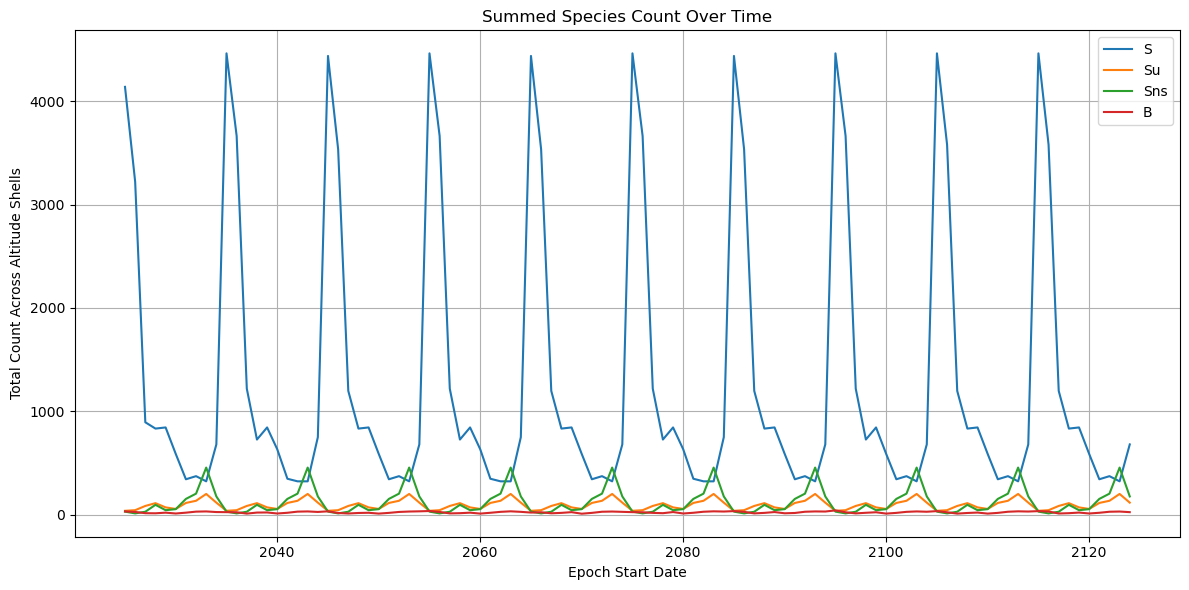

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


# Load your DataFrame
df['epoch_start_date'] = pd.to_datetime(df['epoch_start_date'])

# Sum across all alt_bin values (i.e., group by epoch_start_date)
grouped = df.groupby('epoch_start_date').sum(numeric_only=True)

# Identify species columns of interest
s_cols   = [col for col in grouped.columns if col.startswith('S_')]
su_cols  = [col for col in grouped.columns if col.startswith('Su_')]
sns_cols = [col for col in grouped.columns if col.startswith('Sns')]
b_cols = [col for col in grouped.columns if col.startswith('B')]

# Sum within each category
grouped['S_total']   = grouped[s_cols].sum(axis=1)
grouped['Su_total']  = grouped[su_cols].sum(axis=1)
grouped['Sns_total'] = grouped[sns_cols].sum(axis=1)
grouped['B_total'] = grouped[b_cols].sum(axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped['S_total'], label='S')
plt.plot(grouped.index, grouped['Su_total'], label='Su')
plt.plot(grouped.index, grouped['Sns_total'], label='Sns')
plt.plot(grouped.index, grouped['B_total'], label='B')


plt.xlabel('Epoch Start Date')
plt.ylabel('Total Count Across Altitude Shells')
plt.title('Summed Species Count Over Time')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

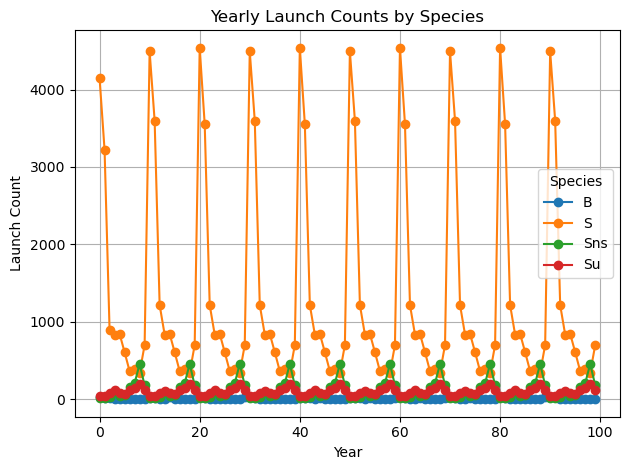

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace with your local path
csv_path = '/Users/indigobrownhall/Code/pyssem/figures/SEP2/yearly_launch_counts.csv'

# Load the CSV
df = pd.read_csv(csv_path)

# Check and fix column names
df.columns = ['Species', 'Year', 'Launch_Count']

# Pivot for plotting
pivot_df = df.pivot(index='Year', columns='Species', values='Launch_Count')

# Plot
plt.figure(figsize=(20, 6))
pivot_df.plot(marker='o')
plt.title("Yearly Launch Counts by Species")
plt.xlabel("Year")
plt.ylabel("Launch Count")
plt.grid(True)
plt.legend(title="Species")
plt.tight_layout()
plt.show()

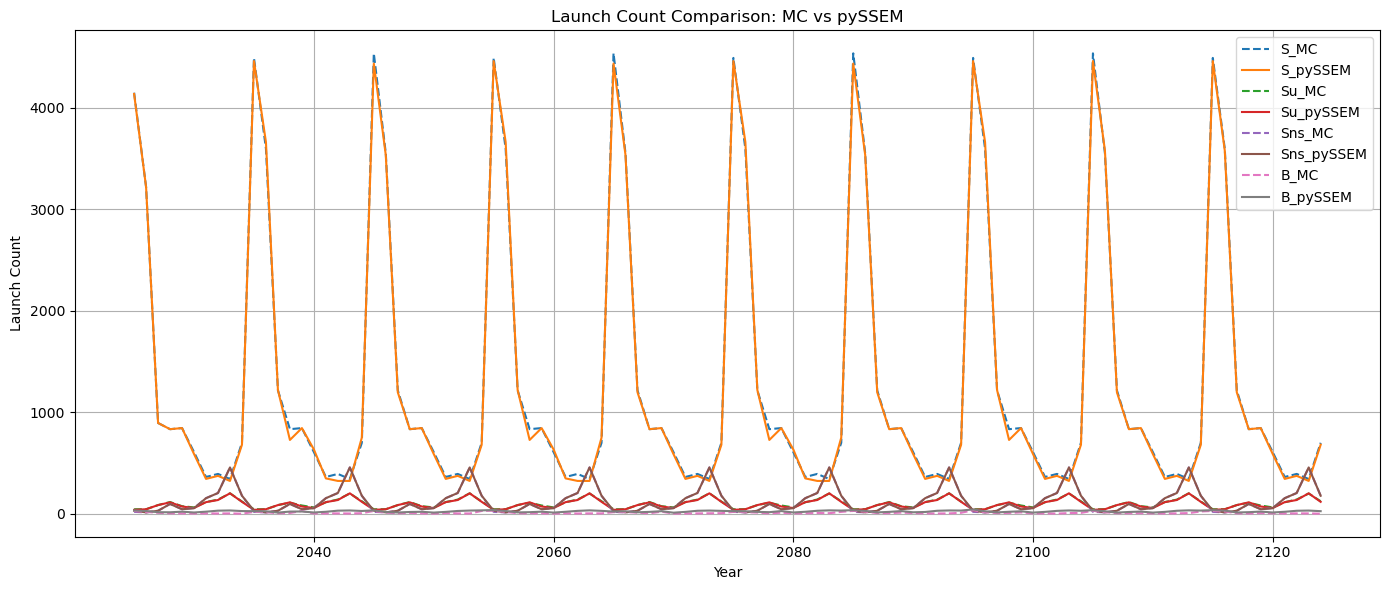

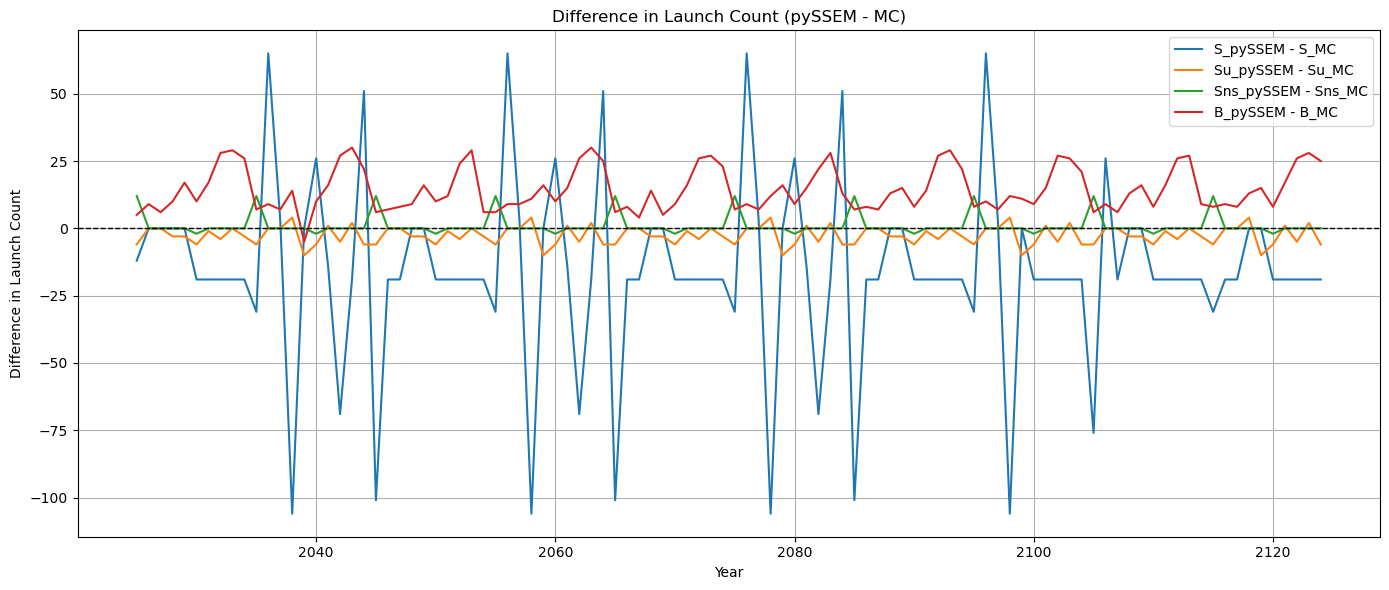

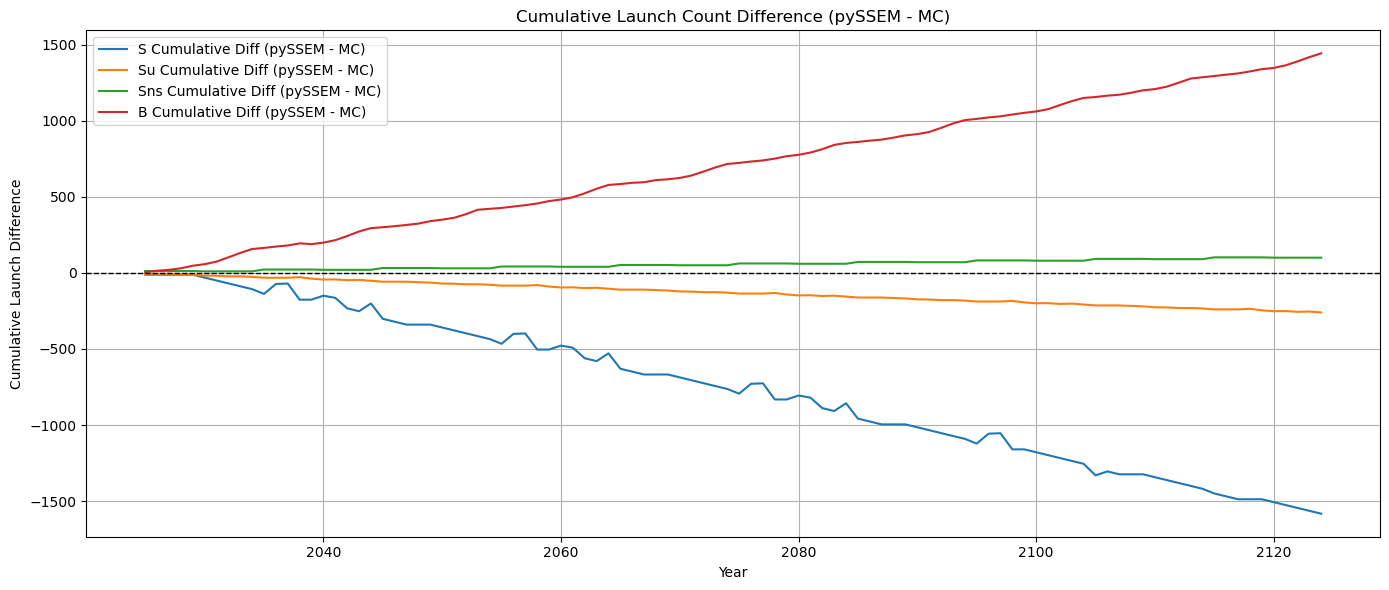

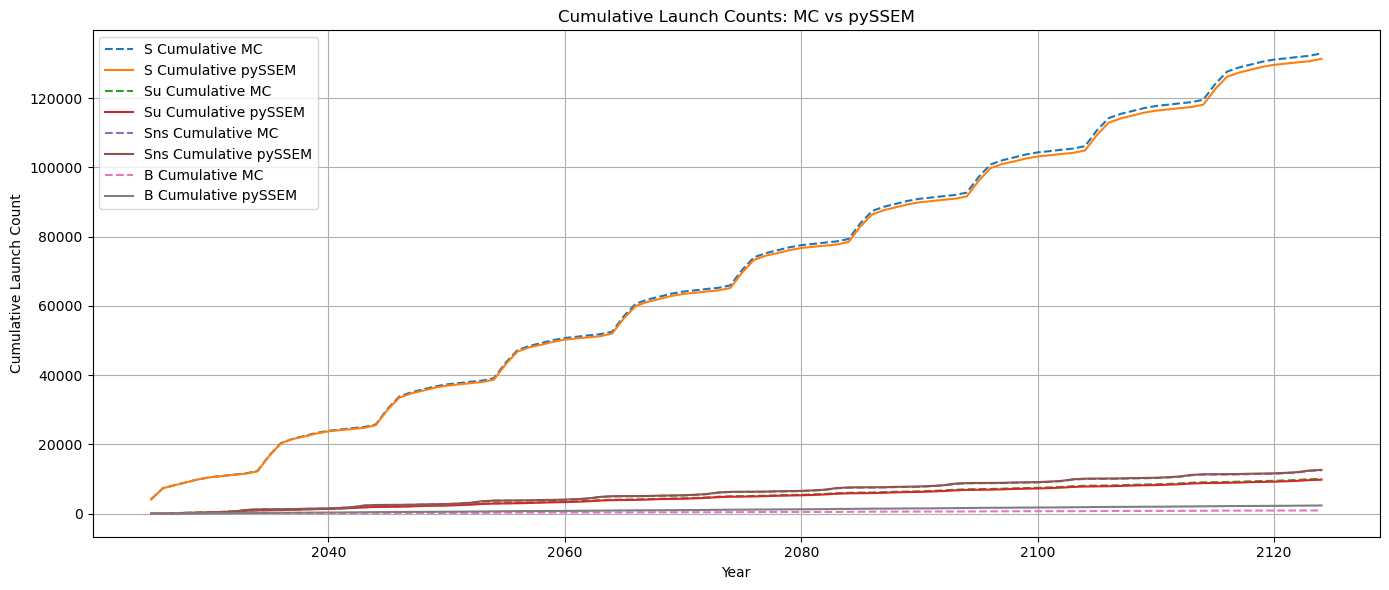

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load MATLAB MC dataset ---
df_MC = pd.read_csv('/Users/indigobrownhall/Code/pyssem/figures/SEP2/yearly_launch_counts.csv')
df_MC.columns = ['Species', 'Year', 'Launch_Count']
pivot_MC = df_MC.pivot(index='Year', columns='Species', values='Launch_Count')
pivot_MC.index = pivot_MC.index + 2025  # Now years 0–99 become 2025–2124

# --- Prepare pySSEM grouped data ---
# Assume 'grouped' already exists from previous block
# If not, you'd add the DataFrame loading and preprocessing steps here

# Interpolate and resample pySSEM data to match MC year bins
grouped_year = grouped.copy()
grouped_year['Year'] = grouped_year.index.year
grouped_pySSEM = grouped_year.groupby('Year')[['S_total', 'Su_total', 'Sns_total', 'B_total']].sum()

# Rename for clarity
grouped_pySSEM.columns = [col.replace('_total', '_pySSEM') for col in grouped_pySSEM.columns]
pivot_MC.columns = [col + '_MC' for col in pivot_MC.columns]

# --- Merge datasets ---
merged = pd.merge(pivot_MC, grouped_pySSEM, left_index=True, right_index=True, how='inner')

# --- Plot 1: Overlaid curves ---
plt.figure(figsize=(14, 6))
for sp in ['S', 'Su', 'Sns', 'B']:
    plt.plot(merged.index, merged[f'{sp}_MC'], label=f'{sp}_MC', linestyle='--')
    plt.plot(merged.index, merged[f'{sp}_pySSEM'], label=f'{sp}_pySSEM')
plt.xlabel('Year')
plt.ylabel('Launch Count')
plt.title('Launch Count Comparison: MC vs pySSEM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 2: Differences ---
plt.figure(figsize=(14, 6))
for sp in ['S', 'Su', 'Sns', 'B']:
    diff = merged[f'{sp}_pySSEM'] - merged[f'{sp}_MC']
    plt.plot(merged.index, diff, label=f'{sp}_pySSEM - {sp}_MC')
plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Difference in Launch Count')
plt.title('Difference in Launch Count (pySSEM - MC)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 3: Cumulative Launch Difference (pySSEM - MC) ---
plt.figure(figsize=(14, 6))

for sp in ['S', 'Su', 'Sns', 'B']:
    cumsum_pySSEM = merged[f'{sp}_pySSEM'].cumsum()
    cumsum_MC = merged[f'{sp}_MC'].cumsum()
    cum_diff = cumsum_pySSEM - cumsum_MC
    plt.plot(merged.index, cum_diff, label=f'{sp} Cumulative Diff (pySSEM - MC)')

plt.axhline(0, color='k', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Cumulative Launch Difference')
plt.title('Cumulative Launch Count Difference (pySSEM - MC)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot 3: Cumulative Launch Totals (MC and pySSEM) ---
plt.figure(figsize=(14, 6))

for sp in ['S', 'Su', 'Sns', 'B']:
    cumsum_pySSEM = merged[f'{sp}_pySSEM'].cumsum()
    cumsum_MC = merged[f'{sp}_MC'].cumsum()
    plt.plot(merged.index, cumsum_MC, linestyle='--', label=f'{sp} Cumulative MC')
    plt.plot(merged.index, cumsum_pySSEM, label=f'{sp} Cumulative pySSEM')

plt.xlabel('Year')
plt.ylabel('Cumulative Launch Count')
plt.title('Cumulative Launch Counts: MC vs pySSEM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
scenario_properties.FLM_steps['Sns'].sum()

12660.0